# Analysis of TEBD on the Ising Model

In [1]:
from typing import Optional

import matplotlib.pyplot as plt

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import run_tebd
from tebd.tebd import TEBD

In [2]:
def run_tebd_ising(
        N: int, bond_dim: int, J: float, lmda: float, tau: float, num_iter: int, mid_steps: int,
        print_to_stdout: Optional[bool] = True, evol_type: Optional[str] = "imag", st_order: Optional[str] = "ST1"
):
    """Run TEBD for the Ising model in transverse

    Args:
        N: Number of sites
        bond_dim: Bond dimension
        J: Nearest neighbor coupling
        lmda: Coupling to external field
        tau: Timestep
        num_iter: Number of iterations
        mid_steps: Number of steps between each diagnostic
        print_to_stdout: Whether to print diagnostic information to screen
        evol_type: Type of time evolution (e.g., "real" or "imag")
        st_order: Order of Suzuki-Trotter decomposition (i.e., "ST1" or "ST2")

    Returns:
        Energy and wavefunction at each midstep

    """
    d = 2

    MPS = MatrixProductState(d=d, N=N, bond_dim=bond_dim)

    # create Hamiltonians
    loc_ham_ising = LocalIsingHamiltonian(N, J, lmda)
    glob_ham_ising = IsingHamiltonian(N, J, lmda)

    # create TEBD object
    tebd_obj = TEBD(MPS, loc_ham_ising, glob_ham_ising, evol_type=evol_type, st_order=st_order)

    # run algorithm
    energies, wave_functions = run_tebd(tebd_obj, tau, num_iter, mid_steps, print_to_stdout)

    return energies, wave_functions

## Effect of Bond Dimension

In [3]:
N = 10

In [4]:
J = 1
lmda = 0

In [5]:
tau = 0.01
num_iter = 1000
mid_steps = 10

In [6]:
bond_dim = 2
energies_2, wave_functions_2 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

In [7]:
bond_dim = 10
energies_10, wave_functions_10 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

In [8]:
bond_dim = 20
energies_20, wave_functions_20 = run_tebd_ising(N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False)

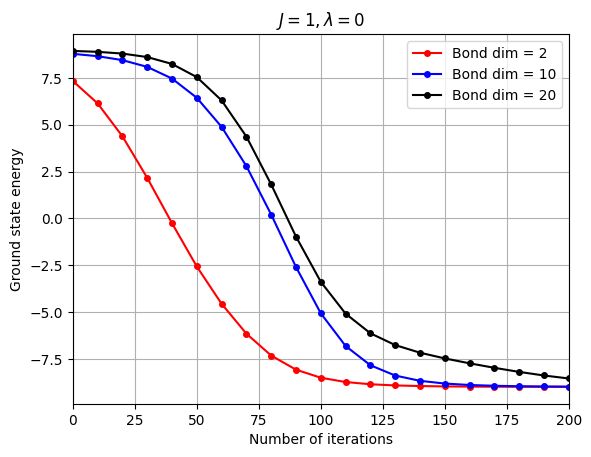

In [10]:
plt.plot(range(0, num_iter, mid_steps), energies_2, 'ro-', label="Bond dim = 2", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_10, 'bo-', label="Bond dim = 10", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_20, 'ko-', label="Bond dim = 20", markersize=4)
plt.xlabel("Number of iterations")
plt.ylabel("Ground state energy")
plt.legend()
plt.title("$J=1, \lambda=0$")
plt.grid()
plt.xlim([0, 200])
plt.savefig('../figures/ground_state_energy_vs_iterations_diff_bond_dim.png', bbox_inches='tight', dpi=300);

## Effect of $J$

In [11]:
J_vals = [-2, -1, 1, 2]

In [12]:
bond_dim = 2

In [13]:
energies_J = []

for J in J_vals:
    energies, wave_functions = run_tebd_ising(
        N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=True
    )
    energies_J.append(energies)

Iteration: 0 of 1000, energy: -14.876969748454528
Iteration: 10 of 1000, energy: -17.110952855329806
Iteration: 20 of 1000, energy: -17.73011284234039
Iteration: 30 of 1000, energy: -17.906244326363023
Iteration: 40 of 1000, energy: -17.963499612530732
Iteration: 50 of 1000, energy: -17.984739671687272
Iteration: 60 of 1000, energy: -17.993373626555687
Iteration: 70 of 1000, energy: -17.99706914600125
Iteration: 80 of 1000, energy: -17.998692486202522
Iteration: 90 of 1000, energy: -17.99941439494532
Iteration: 100 of 1000, energy: -17.999737254056782
Iteration: 110 of 1000, energy: -17.99988201803982
Iteration: 120 of 1000, energy: -17.99994700291537
Iteration: 130 of 1000, energy: -17.999976190030008
Iteration: 140 of 1000, energy: -17.9999893021279
Iteration: 150 of 1000, energy: -17.9999951932648
Iteration: 160 of 1000, energy: -17.999997840220658
Iteration: 170 of 1000, energy: -17.999999029553784
Iteration: 180 of 1000, energy: -17.999999563951487
Iteration: 190 of 1000, energy: 

Iteration: 650 of 1000, energy: -8.999999999997073
Iteration: 660 of 1000, energy: -8.999999999998074
Iteration: 670 of 1000, energy: -8.999999999998682
Iteration: 680 of 1000, energy: -8.999999999999133
Iteration: 690 of 1000, energy: -8.99999999999942
Iteration: 700 of 1000, energy: -8.999999999999641
Iteration: 710 of 1000, energy: -8.999999999999734
Iteration: 720 of 1000, energy: -8.999999999999822
Iteration: 730 of 1000, energy: -8.999999999999861
Iteration: 740 of 1000, energy: -8.999999999999925
Iteration: 750 of 1000, energy: -8.999999999999957
Iteration: 760 of 1000, energy: -8.999999999999996
Iteration: 770 of 1000, energy: -8.999999999999966
Iteration: 780 of 1000, energy: -8.999999999999982
Iteration: 790 of 1000, energy: -8.999999999999986
Iteration: 800 of 1000, energy: -8.999999999999996
Iteration: 810 of 1000, energy: -9.00000000000001
Iteration: 820 of 1000, energy: -8.999999999999996
Iteration: 830 of 1000, energy: -9.000000000000002
Iteration: 840 of 1000, energy: -

Iteration: 300 of 1000, energy: -17.99999999324821
Iteration: 310 of 1000, energy: -17.999999996966263
Iteration: 320 of 1000, energy: -17.99999999863685
Iteration: 330 of 1000, energy: -17.999999999387555
Iteration: 340 of 1000, energy: -17.999999999724793
Iteration: 350 of 1000, energy: -17.999999999876376
Iteration: 360 of 1000, energy: -17.99999999994442
Iteration: 370 of 1000, energy: -17.999999999975024
Iteration: 380 of 1000, energy: -17.999999999988745
Iteration: 390 of 1000, energy: -17.999999999994905
Iteration: 400 of 1000, energy: -17.999999999997723
Iteration: 410 of 1000, energy: -17.999999999999012
Iteration: 420 of 1000, energy: -17.99999999999955
Iteration: 430 of 1000, energy: -17.99999999999979
Iteration: 440 of 1000, energy: -17.999999999999886
Iteration: 450 of 1000, energy: -17.999999999999943
Iteration: 460 of 1000, energy: -17.99999999999998
Iteration: 470 of 1000, energy: -18.000000000000004
Iteration: 480 of 1000, energy: -17.99999999999998
Iteration: 490 of 1

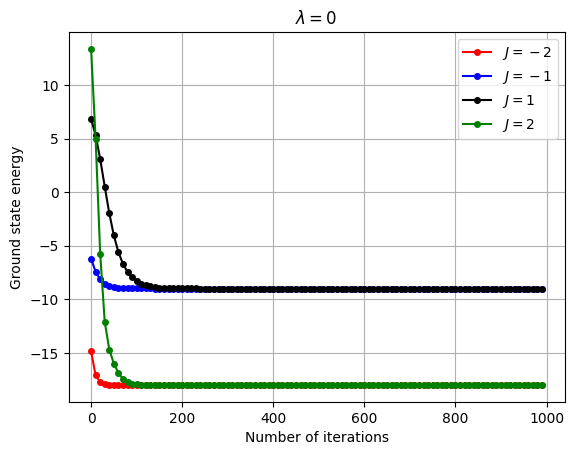

In [14]:
plt.plot(range(0, num_iter, mid_steps), energies_J[0], 'ro-', label="$J=-2$", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_J[1], 'bo-', label="$J=-1$", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_J[2], 'ko-', label="$J=1$", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_J[3], 'go-', label="$J=2$", markersize=4)
plt.xlabel("Number of iterations")
plt.ylabel("Ground state energy")
plt.legend()
plt.title("$\lambda=0$")
plt.grid();

## Effect of Suzuki-Trotter Decomposition

In [25]:
J = 1
lmda = 0

In [30]:
N = 8
tau = 0.01
num_iter = 1000
mid_steps = 10

In [31]:
st_order = "ST1"
energies_st1, wave_functions_st1 = run_tebd_ising(
    N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False, st_order=st_order
)

In [32]:
st_order = "ST2"
energies_st2, wave_functions_st2 = run_tebd_ising(
    N, bond_dim, J, lmda, tau, num_iter, mid_steps, print_to_stdout=False, st_order=st_order
)

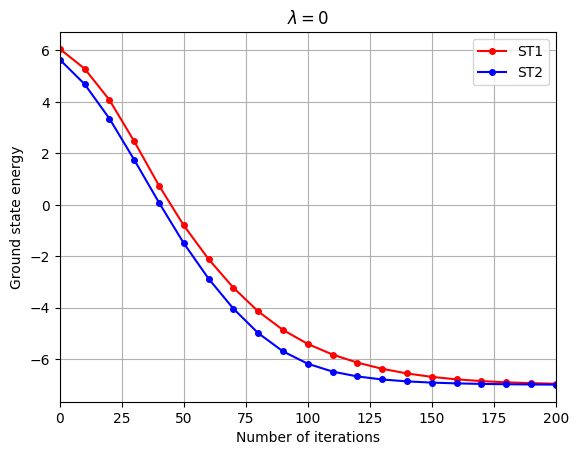

In [33]:
plt.plot(range(0, num_iter, mid_steps), energies_st1, 'ro-', label="ST1", markersize=4)
plt.plot(range(0, num_iter, mid_steps), energies_st2, 'bo-', label="ST2", markersize=4)
plt.xlabel("Number of iterations")
plt.ylabel("Ground state energy")
plt.legend()
plt.title("$\lambda=0$")
plt.xlim([0, 200])
plt.grid();